# **Entrega 3 - Reconocimiento de patrones**

## **Ejercicio 1**

Utilice la imagen "[figures_1.jpg](https://drive.google.com/file/d/18V8DsnqhxjZAs3alX0hO3xHfUBT5JV2I/view?usp=sharing)" para detectar todos los tipos posibles de figuras contenidas en ella (triángulos, rectángulos, pentágonos, hexágonos, heptágonos, octágonos y círculos). Subrayar en la imágen principal los contornos de todas las figuras geométricas contenidas en ella. A continuación, imprima la imagen original y al lado, la imagen con los contornos de las figuras dibujadas. Además, imprima la cantidad aproximada de cada tipo de figura geométrica contenida en la imagen original y muestrelos.

In [1]:
# Importar librerias. Incluya acá todas las librerías que requiera
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
from skimage import measure
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image


Mounted at /content/drive


Triangulos: 17
Rectangulos: 45
Pentagonos: 2
Hexagonos: 0
Heptagonos: 0
Octagonos: 0


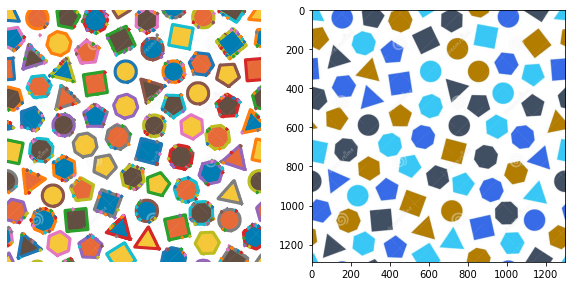

In [3]:
img_c = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/figures_1.jpg', 0)
img_Original = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/figures_1.jpg', 1)
#---- Introduzca su codigo aqui. Puede utilizar cuantas celdas de código considere necesarias

# Apply a threshold (binary)
_, threshold = cv2.threshold(img_c, 230, 255, cv2.THRESH_BINARY)

# Find contours at a constant value of 0.8
contours = measure.find_contours(threshold, 0.5)

# Display the image and plot all contours found
fig, (ax, ax2) = plt.subplots(ncols=2 ,figsize = (10,10))
#ax.imshow(img_c, cmap=plt.cm.gray)
ax.imshow(cv2.cvtColor(img_Original, cv2.COLOR_BGR2RGB))

Triangulos = 0
Rectangulos = 0
Pentagonos = 0
Hexagonos = 0
Heptagonos = 0
Octagonos = 0
Circulos = 0


for n, contour in enumerate(contours):
    coords = approximate_polygon(contour, tolerance=40)
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
    if len(coords)-1 == 3:
      Triangulos += 1
    elif len(coords)-1 == 4:
      Rectangulos += 1
    elif len(coords)-1 == 5:
      Pentagonos += 1
    elif len(coords)-1 == 6:
      Hexagonos += 1
    elif len(coords)-1 == 7:
      Heptagonos += 1
    elif len(coords)-1 == 8:
      Octagonos += 1

print('Triangulos:', Triangulos)
print('Rectangulos:', Rectangulos)
print('Pentagonos:', Pentagonos)
print('Hexagonos:', Hexagonos)
print('Heptagonos:', Heptagonos)
print('Octagonos:', Octagonos)

ax2.imshow(img_Original)
ax.set_axis_off()
plt.show()



## **Ejercicio 2**

Utilice la imagen "[figures_2.jpg](https://drive.google.com/file/d/1Sr8GCrY6qxAfyZ3JQSaf_wdot1HwgRBg/view?usp=sharing)" para detectar y contar todos los cuadrados/rectángulos en la imágen. Imprima el contorno de las figuras detectadas e imprima la cantidad total de figuras.

Cuadrados/Rectangulos: 162


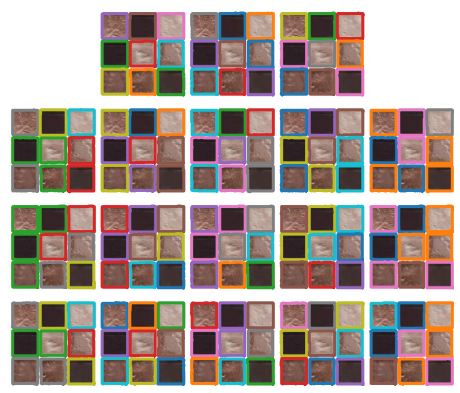

In [6]:
img_c = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/figures_2.png', 0)
img_Original = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/figures_2.png', 1)
#---- Introduzca su codigo aqui. Puede utilizar cuantas celdas de código considere necesarias

# Apply a threshold (binary)
_, threshold = cv2.threshold(img_c, 230, 255, cv2.THRESH_BINARY)

# Find contours at a constant value of 0.8
contours = measure.find_contours(threshold, 0.5)

# Display the image and plot all contours found
fig, (ax) = plt.subplots(ncols=1 ,figsize = (8,8))
#ax.imshow(img_c, cmap=plt.cm.gray)
ax.imshow(cv2.cvtColor(img_Original, cv2.COLOR_BGR2RGB))

CuadradosRectangulos = 0

for n, contour in enumerate(contours):
    coords = approximate_polygon(contour, tolerance=14)
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
    if len(coords)-1 == 4:
      CuadradosRectangulos += 1

print('Cuadrados/Rectangulos:', CuadradosRectangulos)

ax.set_axis_off()
plt.show()


## **Ejercicio 3**

Utilice la imagen "[triangles_1.jpg](https://drive.google.com/file/d/1ei2sNbkPLt30MjfgrLb43Q7ynZsWksMw/view?usp=sharing)" para detectar y contar todos los triangulos perfectos en la imágen. Imprima el contorno de las figuras detectadas e imprima la cantidad total de figuras.

Triangulos: 22


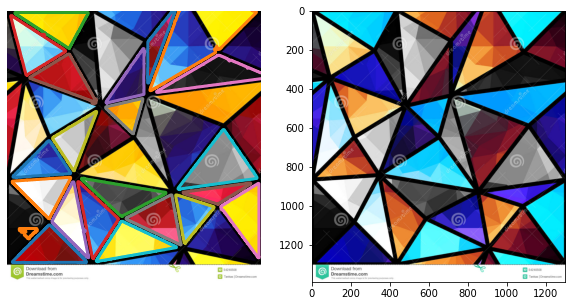

In [ ]:
img_c = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/triangles_1.jpg',0)
img_Original = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/triangles_1.jpg',1)


# Apply a threshold (binary)
_, threshold = cv2.threshold(img_c, cv2.THRESH_TOZERO_INV, cv2.THRESH_TOZERO, cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

# Find contours at a constant value of 0.8
contours = measure.find_contours(opening, 0.8)

# Display the image and plot all contours found
fig, (ax, ax2) = plt.subplots(ncols=2 ,figsize = (10,10))
#ax.imshow(img_c, cmap=plt.cm.gray)
ax.imshow(cv2.cvtColor(img_Original, cv2.COLOR_BGR2RGB))

Triangulos = 0

for n, contour in enumerate(contours):
    coords = approximate_polygon(contour, tolerance=40)
    if len(coords)-1 == 3:
      ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
      Triangulos += 1
  

print('Triangulos:', Triangulos)

ax2.imshow(img_Original)
ax.set_axis_off()

plt.show()



## **Ejercicio 4**

Utilice la imagen "[triangles_2.jpg](https://drive.google.com/file/d/1LkpUO0joahfLB4KHx0Hup17yzoT4d-oj/view?usp=sharing)" para detectar y contar todos los triangulos de color rojo (rosa) en la imágen. Imprima el contorno de las figuras detectadas e imprima la cantidad total de figuras.

In [ ]:
# Importar librerias. Incluya acá todas las librerías que requiera


Triangulos: 18


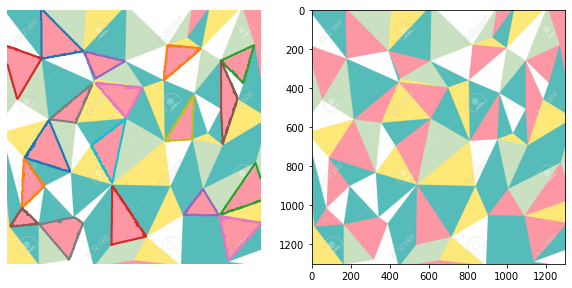

In [ ]:
img_c = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/triangles_2.jpg',0)
img_Original = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Detacción_Y_Metricas/images/triangles_2.jpg',1)


rojoBajo = np.array([175, 0, 20], np.uint8)
rojoAlto = np.array([180, 255, 255], np.uint8)
imageHSV = cv2.cvtColor(img_Original, cv2.COLOR_BGR2HSV)
maskRojo = cv2.inRange(imageHSV, rojoBajo, rojoAlto)

# Find contours at a constant value of 0.8

contours = measure.find_contours(maskRojo, 0.8)

# Display the image and plot all contours found
fig, (ax, ax2) = plt.subplots(ncols=2 ,figsize = (10,10))
ax.imshow(cv2.cvtColor(img_Original, cv2.COLOR_BGR2RGB))

Triangulos = 0

for n, contour in enumerate(contours):
    coords = approximate_polygon(contour, tolerance=60)
    if len(coords)-1 == 3:
      ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
      Triangulos += 1

print('Triangulos:', Triangulos)

ax2.imshow(cv2.cvtColor(img_Original, cv2.COLOR_BGR2RGB) )
ax.set_axis_off()

plt.show()


## **RETO (Opcional) --> C += 2.0**

Utilice la imagen "[monedas_2.jpeg](https://drive.google.com/file/d/1MdLmNbJyUXn87FOLpc1nU10BNJPliDz1/view?usp=sharing)" para detectar los distintos grupos de monedas contenidas en ella. Dibuje un cuadrado de color verde que permita identificar cada una de las monedas de 100COP, un cuadrado rojo que permita identificar las monedas de 200COP y un cuadrado azul que permita identificar cada una de las monedas de 500COP. Al final, muestre la imagen con todos los cuadrados subrayando cada una de las monedas.

**NOTA:** Para realizar este punto, considere usar las plantillas de las monedas provistas aquí ("[100F.jpg](https://drive.google.com/file/d/1wf8gC1ilXMXOWgqK3TpDmR987M6ptVOD/view?usp=sharing)", "[100B.jpg](https://drive.google.com/file/d/18LZLMC2FuO0O78zxmCYPKmMarqyg7FI1/view?usp=sharing)", "[200F.jpg](https://drive.google.com/file/d/15JSSADpLfQaCzRQJeR63W2m9atn9A0s9/view?usp=sharing)", "[200B.jpg](https://drive.google.com/file/d/16Oc-nuJViLWWPwWgBuu_64S2eRjHUj2l/view?usp=sharing)", "[500F.jpg](https://drive.google.com/file/d/12CltokI3iS0N6QBxFiq5hoC1fsh995V1/view?usp=sharing)" y "[500B.jpg](https://drive.google.com/file/d/15ges0LxSvezFiNZIQV8BrBe15dNccvH8/view?usp=sharing)"). Adicionalmente, considere importante que para hacer esta detección debe tener en el tamaño de la plantilla.


In [ ]:
# Importar librerias. Incluya acá todas las librerías que requiera


In [ ]:
original =


#---- Introduzca su codigo aqui. Puede utilizar cuantas celdas de código considere necesarias


(<matplotlib.image.AxesImage at 0x7fef6decb1d0>,
 Text(0.5, 1.0, 'Original'),
 (-0.5, 1279.5, 1230.5, -0.5))

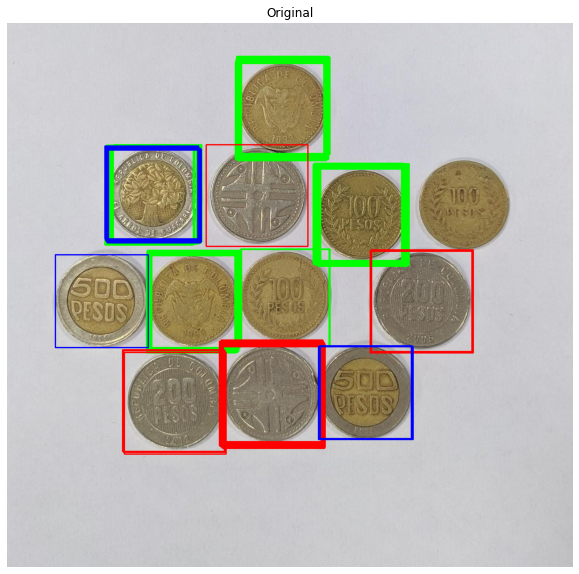

In [ ]:
#---- Muestre imagen original - resultado


(<matplotlib.image.AxesImage at 0x7fd072a6b6d8>,
 Text(0.5, 1.0, 'Original'),
 (-0.5, 719.5, 675.5, -0.5))

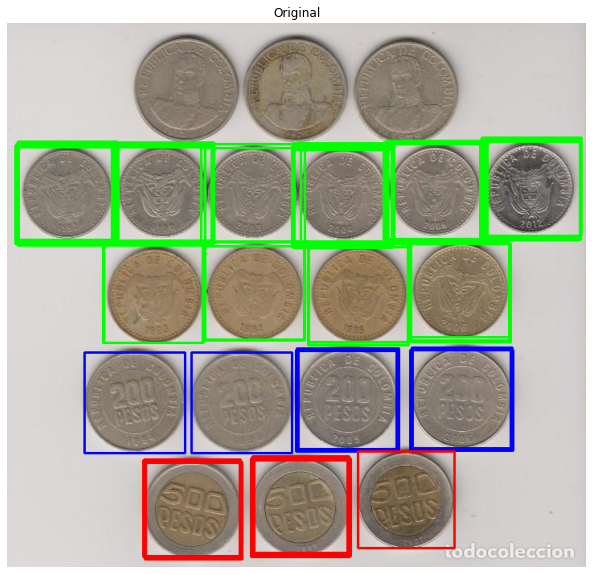

In [ ]:
#---- Muestre imagen original - resultado
